# Descriptive Statistics of Cardio Good Fitness

Story told through graphical and numerical representation. 
Getting a general understanding of what we're working with. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('CardioGoodFitness.csv')

In [4]:
# display the first 5 rows of the data set to get better understanding
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
# prints out info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
# quick statistics gathered from set
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [11]:
# checking to see if there are any missing data points
df.isna().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002333C030630>,
      dtype=object)

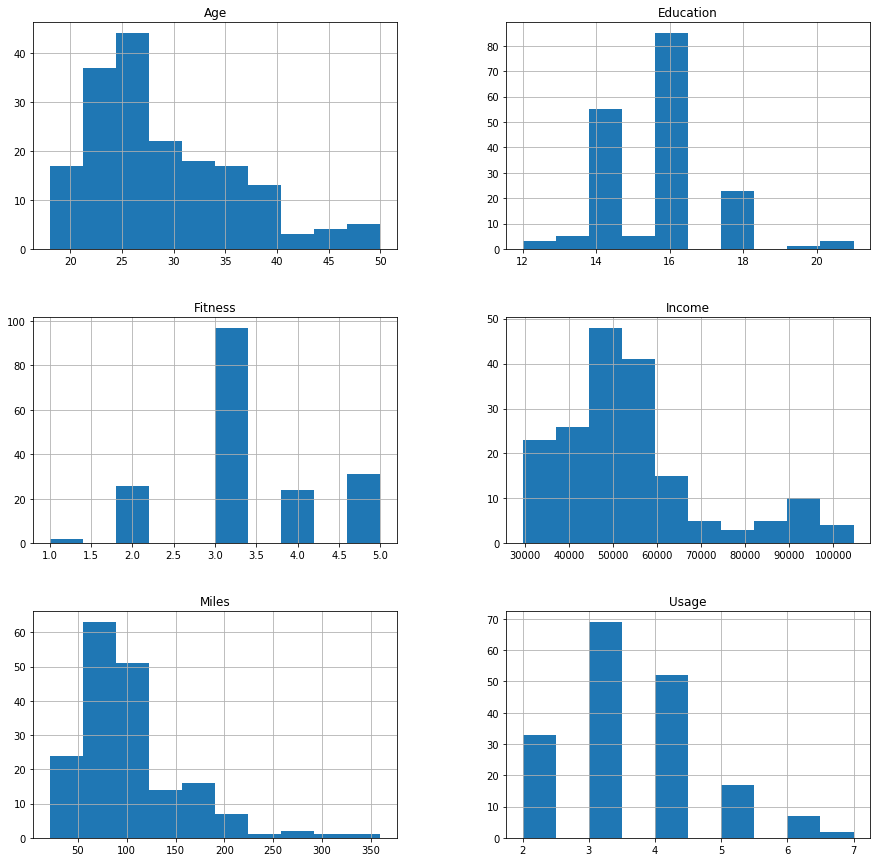

In [18]:
# generate some histogram to represent distribution of parameters
df.hist(figsize = (15,15))

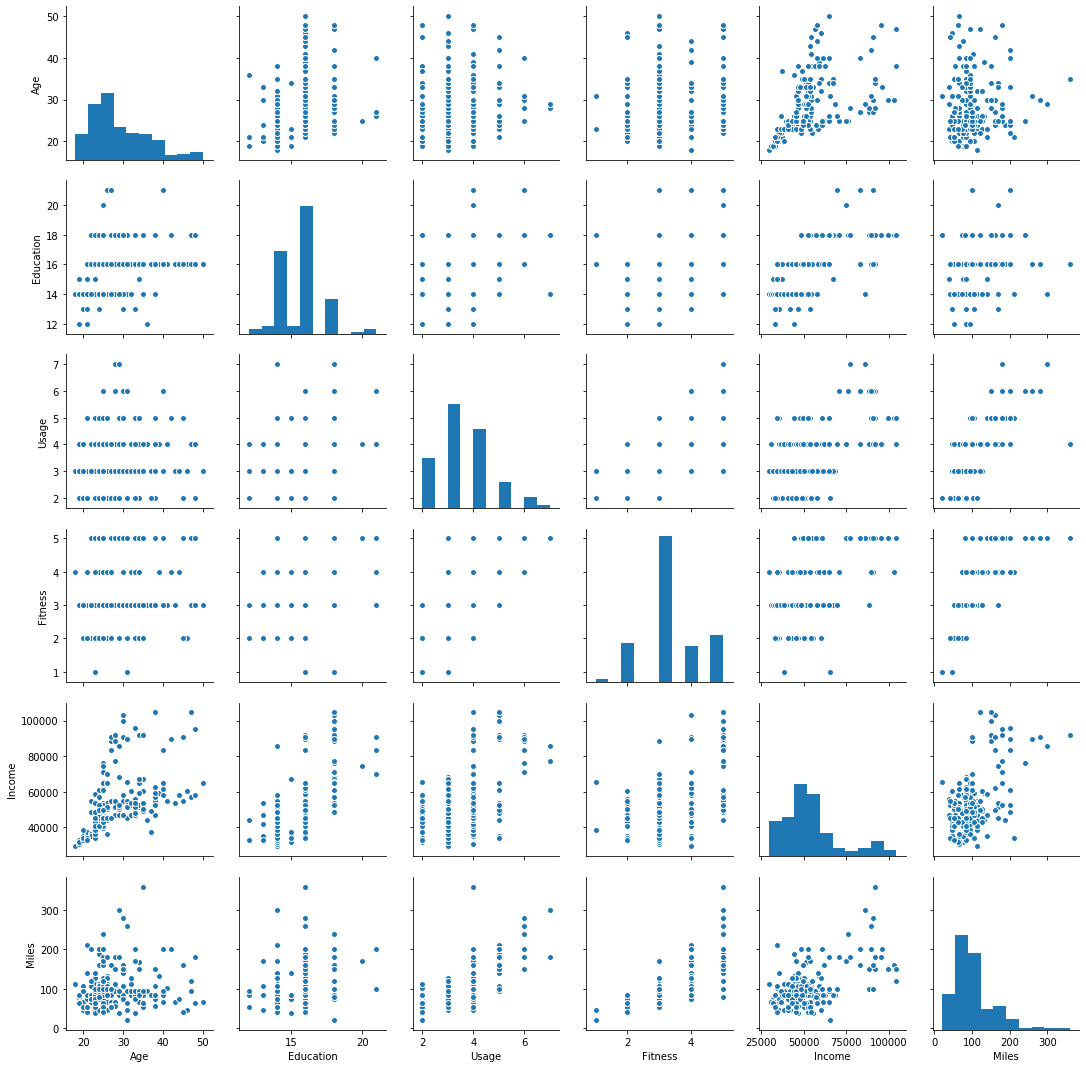

In [5]:
# exploratory analysis of relational parameters
sns.pairplot(data=df)

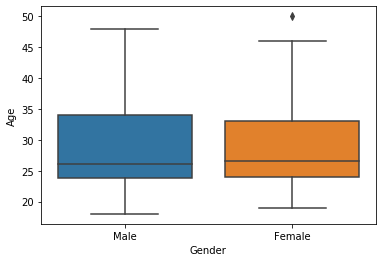

In [17]:
# Is one gender more likely to purchase a treadmill? 
sns.boxplot(x = 'Gender', y = "Age", data = df)

The remainder of the analysis will be looking specifically at the three types of products being offered at Cardio Good Fitness. 

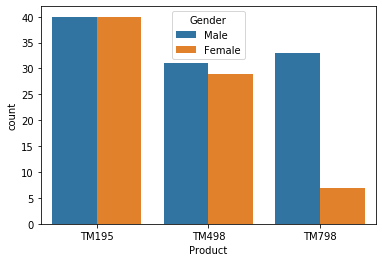

In [21]:
sns.countplot(x= "Product", hue = 'Gender', data = df)

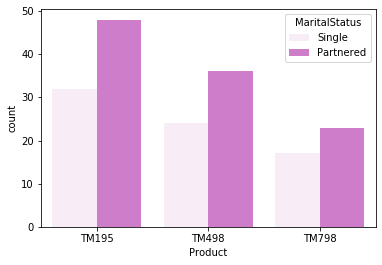

In [42]:
sns.countplot(x= "Product", hue = 'MaritalStatus', color = 'orchid', data = df)

C:\Users\nickl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Miles Ran')

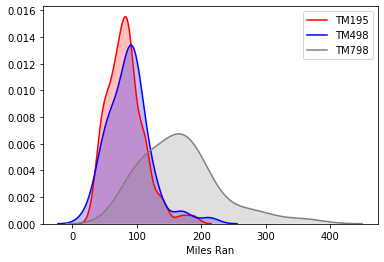

In [34]:
sns.kdeplot(df.Miles[df.Product == 'TM195'], shade=True, color="r", label = 'TM195')
sns.kdeplot(df.Miles[df.Product == 'TM498'], shade=True, color="b", label = 'TM498')
sns.kdeplot(df.Miles[df.Product == 'TM798'], shade=True, color="gray", label = 'TM798')
plt.xlabel('Miles Ran')

C:\Users\nickl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Education (in years)')

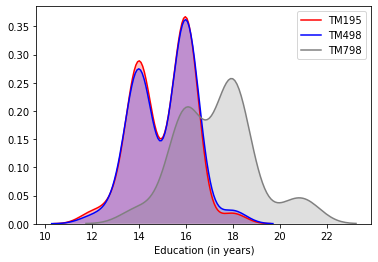

In [29]:
sns.kdeplot(df.Education[df.Product == 'TM195'], shade=True, color="r", label = 'TM195')
sns.kdeplot(df.Education[df.Product == 'TM498'], shade=True, color="b", label = 'TM498')
sns.kdeplot(df.Education[df.Product == 'TM798'], shade=True, color="gray", label = 'TM798')
plt.xlabel('Education (in years)')

C:\Users\nickl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


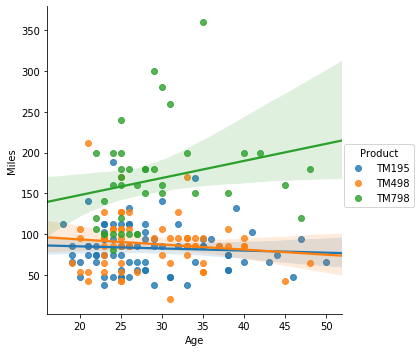

In [47]:
sns.lmplot(x ="Age", y ="Miles", hue="Product", data=df)

C:\Users\nickl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


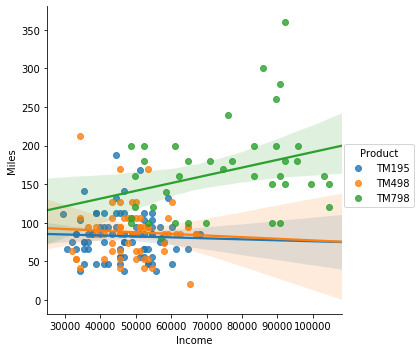

In [48]:
sns.lmplot(x ="Income", y ="Miles", hue="Product", data=df)

In [59]:
#Load function from sklearn
from sklearn import linear_model

# Create linear regression object
reg = linear_model.LinearRegression()

y = df.Miles
x = df[['Usage','Fitness']]

# Train the model using the training sets
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
reg.coef_

array([20.21486334, 27.20649954])

In [61]:
reg.intercept_

-56.74288178464859

Miles Predicted = `-56.74 + 20.21 * Usage + 27.2 * Fitness`

In [74]:
df1 = df.loc[df['Product'] == "TM195"]

In [77]:
df2 = df.loc[df['Product'] == "TM498"]

In [78]:
df3 = df.loc[df['Product'] == "TM798"]

In [79]:
# Create linear regression object
reg1 = linear_model.LinearRegression()

y1 = df1.Miles
x1 = df1[['Usage','Fitness']]

# Train the model using the training sets
reg1.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
reg1.coef_

array([12.21173813, 29.15467988])

In [82]:
reg1.intercept_

-41.286980619934326

Miles Predicted for TM 195 = `-41.29 + 12.21 * Usage + 29.15 * Fitness`

In [83]:
# Create linear regression object
reg2 = linear_model.LinearRegression()

y2 = df2.Miles
x2 = df2[['Usage','Fitness']]

# Train the model using the training sets
reg2.fit(x2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
reg2.coef_

array([20.70134228, 26.55154018])

In [86]:
reg2.intercept_

-52.550249526759586

Miles Predicted for TM 498 = `-52.55 + 20.7 * Usage + 26.55 * Fitness`

In [87]:
# Create linear regression object
reg3 = linear_model.LinearRegression()

y3 = df3.Miles
x3 = df3[['Usage','Fitness']]

# Train the model using the training sets
reg3.fit(x3,y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
reg3.coef_

array([27.6929954 , 26.22888638])

In [89]:
reg3.intercept_

-86.64265254752192

Miles Predicted for TM 798 = `-86.64 + 27.69 * Usage + 26.23 * Fitness`